In [1]:
from tomopy.prep.normalize import normalize
import tomopy
import dxchange
import numpy as np
import os
import tomopy.util.mproc as mproc
import tomopy.util.dtype as dtype
import numexpr as ne
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image
from skimage.transform import iradon


olefile module not found


# FBP

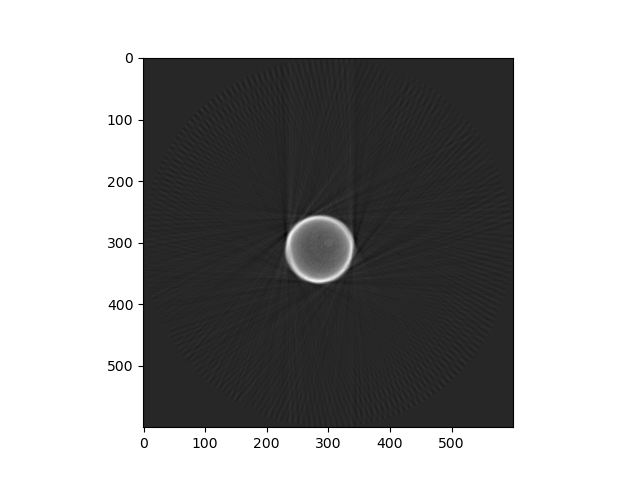

In [2]:
%matplotlib widget

sinogram = np.empty((200, 600))
fig, ax = plt.subplots()
n_projections = 200

for i in range(n_projections):    # for a slice
    normal = np.array(Image.open(f"vialPinhole/projections/normalized/normal_{i}.tiff"))
    slice = normal[170,:]
    sinogram[i,:] = slice
sinogram = - np.log(sinogram.T)
theta=np.linspace(0,360,200)

rec = iradon(sinogram, theta=theta, filter_name='ramp')
ax.imshow(rec, cmap='gray')

image = Image.fromarray(rec)
image.save("rampFilter.tiff")



## Sinogram and slice for circle artefact


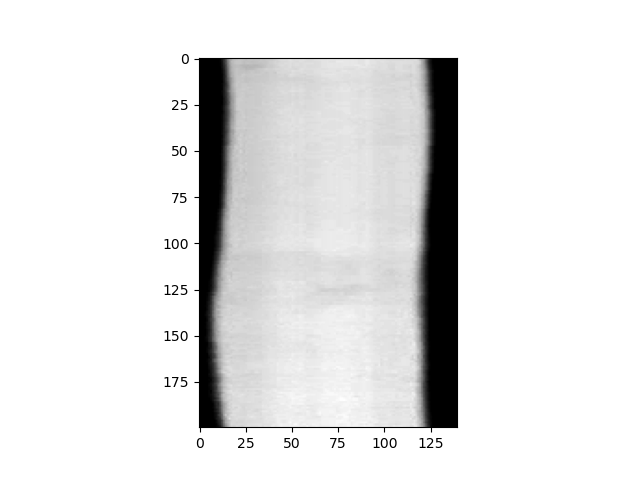

In [5]:
%matplotlib widget
sinogram = np.empty((200, 600))




fig, ax = plt.subplots()
#ax = ax.flatten()
n_projections = 200

for i in range(200):    # for a slice
    normal = np.array(Image.open(f"lamp/projections/normalized/normal_{i}.tiff"))
    slice = normal[615,:]
    sinogram[i,:] = slice
sinogram = - np.log(sinogram)

#ax[1].set_ylabel("Angle (deg)")
#ax[1].set_xlabel("x (mm)")

#ax[1].set_title("Sinogram slice 615")
y_ticks = np.array([0, 90, 180, 270, 360])
y = y_ticks/1.8

x = np.array([0, 40, 80, 120, 200, 250, 300]) 
x_ticks = x * 0.218 
x_ticks = np.round(x_ticks, 1)

sinogram = sinogram[:, 230:370]


#ax[1].set_xticks(x, x_ticks)
#ax[1].set_yticks(y, y_ticks)


ax.imshow(sinogram, cmap='gray')






 


## Wrong Center of Rotation

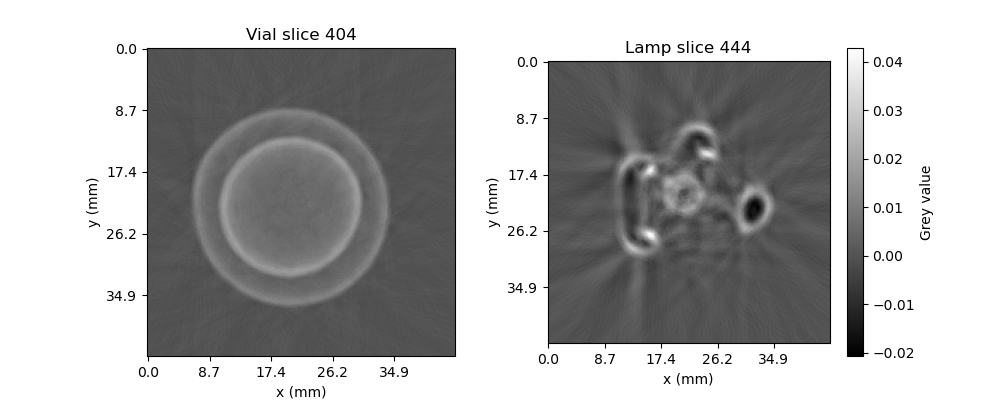

In [7]:
offset = 10

z = 404

fig, ax = plt.subplots(1,2, figsize=(10,4))


norms = []
for i in range(200):
    image = np.array(Image.open(f"vialPinhole/projections/normalized/normal_{i}.tiff"))
    norms.append(image)
norms = np.array(norms)
norms = tomopy.minus_log(norms)
norms.shape

cor = norms.shape[2]/2
cor += offset

theta = tomopy.angles(norms.shape[0], 0, 360)
slice_start = 0
slice_end = len(norms[0])

rec = tomopy.recon(norms[:, slice_start:slice_end, :], theta=theta, center=cor, algorithm='gridrec')
rec = tomopy.circ_mask(rec, axis=0, ratio=0.95)

slice = rec[z, :, :]


good_cor = 296
zz = 444

norms2 = []
for i in range(200):
    image = np.array(Image.open(f"lamp/projections/normalized/normal_{i}.tiff"))
    norms2.append(image)
norms2 = np.array(norms2)
norms2 = tomopy.minus_log(norms2)


cor2 = good_cor + offset
rec2 = tomopy.recon(norms2[:, slice_start:slice_end, :], theta=theta, center=cor2, algorithm='gridrec')
rec2 = tomopy.circ_mask(rec2, axis=0, ratio=0.95)

slice2 = rec2[zz, :, :]



slice = slice[200:400,200:400]




x = np.array([0, 40, 80, 120, 160]) 
x_ticks = x * 0.218 
x_ticks = np.round(x_ticks, 1)




ax[0].set_xticks(x, x_ticks)
ax[0].set_yticks(x, x_ticks)
ax[1].set_xticks(x, x_ticks)
ax[1].set_yticks(x, x_ticks)

slice2 = slice2[200:400,200:400]

ax[0].set_title("Vial slice 404")
ax[0].set_xlabel("x (mm)")
ax[0].set_ylabel("y (mm)")

ax[1].set_title("Lamp slice 444")
ax[1].set_xlabel("x (mm)")
ax[1].set_ylabel("y (mm)")


vmin = np.min(slice2)
vmax = np.max(slice2)


ax[0].imshow(slice, cmap="gray", vmin=vmin, vmax=vmax)
vial = ax[1].imshow(slice2, cmap='gray', vmin=vmin, vmax=vmax)

cbar1 = fig.colorbar(vial, orientation='vertical')
cbar1.set_label('Grey value')






# skip artefact

[0, 1, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13, 14, 15, 16, 16, 16, 17, 17, 17, 17, 18, 19, 19, 19, 20, 21, 21, 21, 21, 22, 23, 23, 23, 23, 23, 24, 24, 25, 26, 26, 26, 26, 27, 28, 29, 30, 31, 31, 32, 33, 33, 33, 33, 33, 34, 35, 35, 35, 36, 36, 36, 36, 36, 37, 38, 38, 38, 38, 39, 40, 41, 42, 43, 44, 45, 45, 45, 46, 47, 47, 47, 48, 49, 50, 51, 51, 51, 51, 52, 53, 54, 55, 56, 57, 58, 59, 59, 59, 59, 60, 60, 61, 61, 61, 61, 62, 63, 63, 63, 63, 63, 64, 65, 66, 66, 66, 66, 66, 67, 67, 68, 69, 70, 71, 72, 73, 74, 74, 74, 74, 74, 75, 76, 76, 76, 77, 77, 77, 77, 77, 78, 79, 80, 81, 82, 83, 83, 83, 84, 85, 86, 87, 88, 88, 88, 88, 88, 89, 89, 89, 89, 90, 91, 92, 93, 94, 95, 96, 96, 97, 98, 98, 98, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 110, 111, 111, 111, 112, 113, 114, 115]
200


Text(0, 0.5, 'y (mm)')

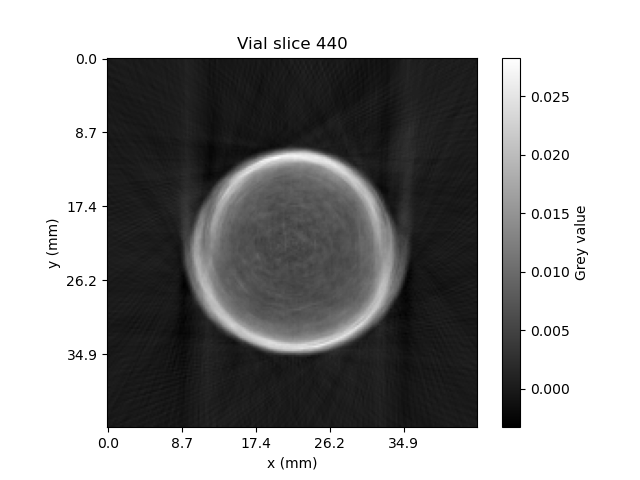

In [11]:
# RUN THIS CELL UNTIL IT WORKS

%matplotlib widget
fig, ax = plt.subplots()

n_projections = 200
sinograms = np.empty((n_projections, 600))






indices = []

# Generate the indices with the given probability
for i in range(n_projections):
    if len(indices)==n_projections:
        break


    if random.random() < 0.3:  # 10% probability
        num_repeats = random.randint(1, min(5, n_projections - i))  # Randomly choose how many repeats
        indices.extend([i] * num_repeats)  # Add the index and its repeats
    else:
        indices.append(i)



print(indices)





print(len(indices))

for i, j in enumerate(indices):
    file_name = f'vialPinhole/projections/normalized/normal_{j}.tiff'
    normal = np.array(Image.open(file_name))
    slice = normal[440, :]
    sinograms[i, :] = slice

# Perform operations on sinograms
sinograms = -np.log(sinograms.T)
total_range = 1.8 * (n_projections - 1)
theta = np.linspace(0, total_range, n_projections)

# Reconstruct and display
rec = iradon(sinograms, theta=theta)
recs = ax.imshow(rec[200:400,200:400], cmap='gray')
ax.set_xticks(x, x_ticks)
ax.set_yticks(x, x_ticks)

cbar1 = fig.colorbar(recs, orientation='vertical')
cbar1.set_label('Grey value')

ax.set_title("Vial slice 440")
ax.set_xlabel("x (mm)")
ax.set_ylabel("y (mm)")


# Aliasing


In [13]:
n_projections = 20

sinograms = np.empty((n_projections, 600))

proj = np.linspace(0, 199, n_projections)
proj = proj.astype(np.int16)

for i in range(n_projections):
    normal = np.array(Image.open(f'vialPinhole/projections/normalized/normal_{proj[i]}.tiff'))
    slice = normal[200,:]
    sinograms[i,:] = slice
sinograms = -np.log(sinograms.T)

theta = np.linspace(0, 360, n_projections)


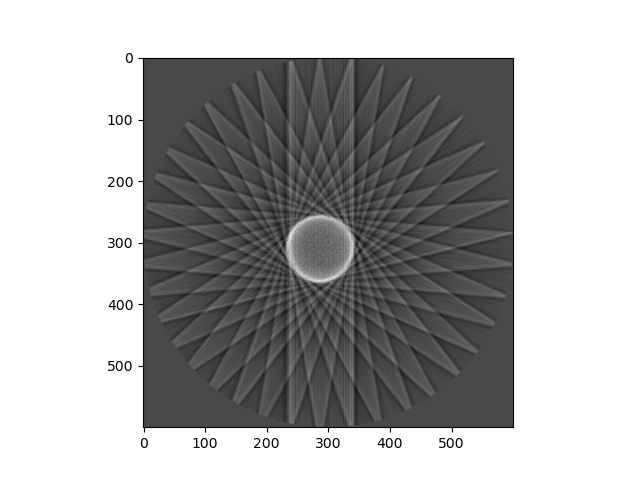

In [14]:
%matplotlib widget

fig, ax = plt.subplots()
rec = iradon(sinograms, theta=theta)
ax.imshow(rec, cmap='gray')

## Aliasing gridrec


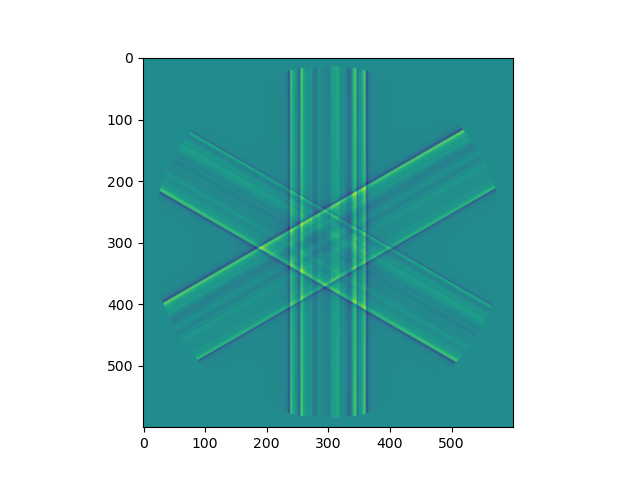

In [15]:
%matplotlib widget 
fig, ax = plt.subplots()


tomos = []

for i in np.arange(0,200,50):
    image = Image.open(f"vialPinhole/projections/normalized/normal_{i}.tiff")
    tomo = np.array(image)
    tomos.append(image)
tomos = np.array(tomos)
tomos = tomopy.minus_log(tomos)

theta = np.arange(0,200,20) * 1.8


cor = tomos.shape[2]/2

theta = tomopy.angles(tomos.shape[0], 0, 360)
slice_start = 0
slice_end = len(tomos[0])

rec = tomopy.recon(tomos[:, slice_start:slice_end, :], theta=theta, center=cor, algorithm='gridrec')
rec = tomopy.circ_mask(rec, axis=0, ratio=0.95)

ax.imshow(rec[300,:,:])

# Normalized image

Text(0.5, 1.0, 'Normalized Vial')

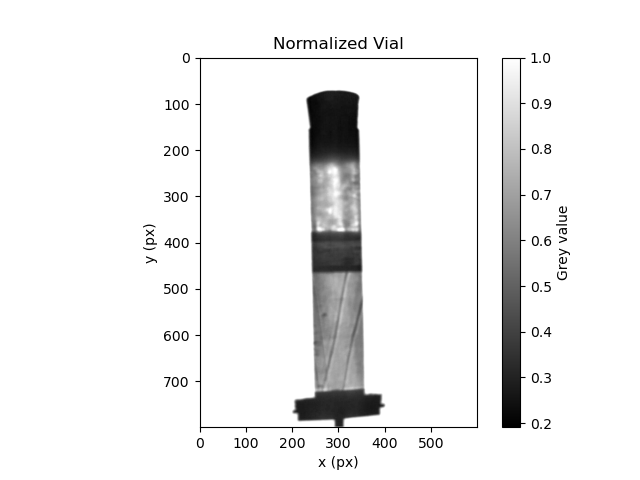

In [17]:
normal = np.array(Image.open("vialPinhole/projections/normalized/normal_0.tiff"))
 
fig, ax = plt.subplots()
vial = ax.imshow(normal, cmap="gray")

cbar1 = fig.colorbar(vial, orientation='vertical')
cbar1.set_label('Grey value')

ax.set_xlabel("x (px)")
ax.set_ylabel("y (px)")
ax.set_title("Normalized Vial")